## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data and Overview

In [2]:
train_df = pd.read_csv('/Users/Shared/Shyam/Datasets/titanic/train.csv')
test_df = pd.read_csv('/Users/Shared/Shyam/Datasets/titanic/test.csv')

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
null_val_train = {'Number' : train_df.isnull().sum() , 'Percentage' : (train_df.isnull().sum()/len(train_df)) * 100}
pd.DataFrame(null_val_train)

,Number,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## Data Visualization

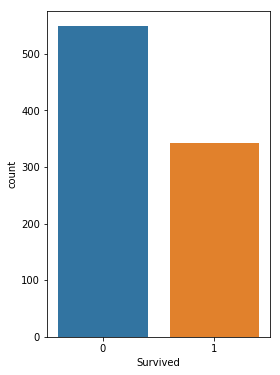

In [8]:
plt.figure(figsize = (4 ,6))
sns.countplot(train_df['Survived'])

More number of non survivors than survivors.

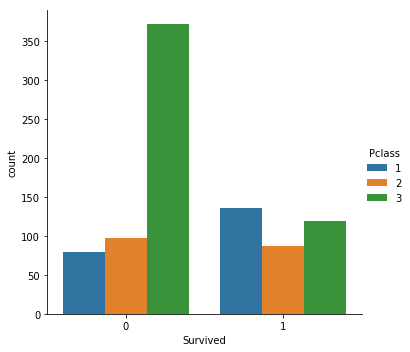

In [9]:
#Survivors vs Passenger Class

sns.catplot('Survived' , kind = 'count' , data = train_df , hue = 'Pclass')

Most of the non-survivors were 3rd class passengers. Passenges class 1 had marginally more survivors than passenger class 3.

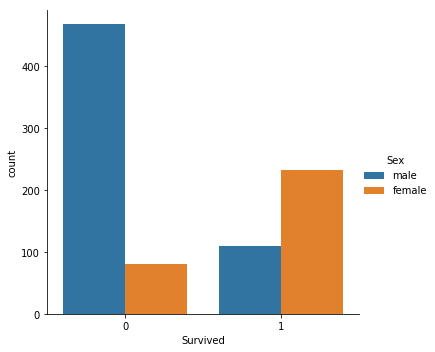

In [10]:
#Survivors vs Sex

sns.catplot('Survived' , kind = 'count' , data = train_df , hue = 'Sex')

Most of the non-survivors were male. Most of the survivors were female

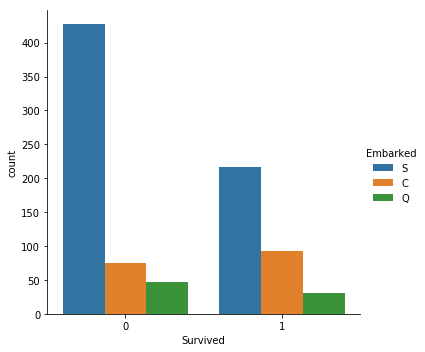

In [11]:
#Survivors vs Port of Embarkment

sns.catplot('Survived' , kind = 'count' , data = train_df , hue = 'Embarked')

More survivors than non-survivors from port C.

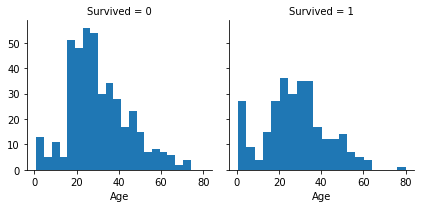

In [12]:
#Distribution of Age by Survivors

grid = sns.FacetGrid(train_df , col = 'Survived')
grid.map(plt.hist , 'Age' , bins = 20)

Most of the non survivors were young adults. Most of the survivors were children, among young and middle age adults.

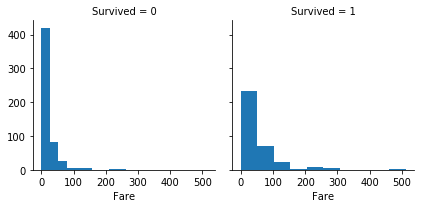

In [13]:
#Distribution of Fare by Survivors

grid = sns.FacetGrid(train_df , col = 'Survived')
grid.map(plt.hist , 'Fare' , bins = 10)

The chances of survival was more likely for passengers who paid a higher fare.

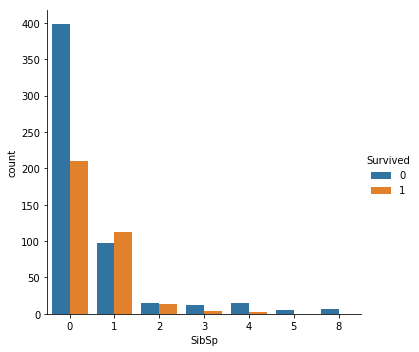

In [14]:
#Siblings and Spouses

sns.catplot('SibSp' , kind = 'count' , data = train_df , hue = 'Survived')

Passengers with 1 sibling/spouse were more likely to survive than others.

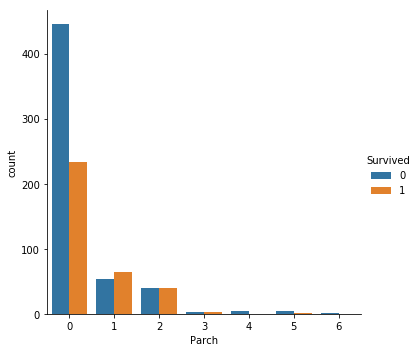

In [15]:
#Parents and Children

sns.catplot('Parch' , kind = 'count' , data = train_df , hue = 'Survived')

Passengers with 1 parent/child were more likely to survive. Passengers with 2 parents/children had equal chances of survival and non-survival

## Data Cleaning

In [16]:
def clean(dataset):
    
    #Reset Index
    dataset.set_index('PassengerId' , inplace = True)
    
    #Dropping columns
    dataset.drop(columns = ['Cabin' , 'Ticket'] , axis = 1 , inplace = True)
    
    #Filling Missing Values
    dataset[['Age' , 'Embarked']] = dataset[['Age' , 'Embarked']].fillna(method = 'ffill')

Setting ID as index and filling missing with ffill method. Dropping Cabin since more than 70% of the values are missing. Dropping Ticket columns since there are too many unique values.

In [17]:
clean(train_df)
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Extracting Titles from Names

In [19]:
def extract_title(dataset):
    
    dataset['Title'] = dataset.Name.str.extract('([a-zA-z]+)\.' , expand = False)
    dataset.drop('Name' , axis = 1 , inplace = True)

In [20]:
extract_title(train_df)

In [21]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Don           1
Mme           1
Countess      1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [22]:
train_df['Title'].replace(['Dr' , 'Rev' , 'Col' , 'Major' , 'Mme' , 'Countess' , 'Lady' , 'Sir' ,
                           'Capt' , 'Don' , 'Jonkheer'] , 'Others' , inplace = True)
train_df['Title'].replace(['Mlle' , 'Mme' , 'Ms'] , 'Miss' , inplace = True)

In [23]:
cols = {'Title' : {'Mr' : 1 , 'Mrs' : 2 , 'Miss' : 3 , 'Master' : 4 , 'Others' : 5} , 
        'Sex' : {'male' : 1 , 'female' : 0} , 'Embarked' : {'S': 1 , 'C' : 2 , 'Q' : 3}}

In [24]:
train_df.replace(cols , inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,1
2,1,1,0,38.0,1,0,71.2833,2,2
3,1,3,0,26.0,0,0,7.9250,1,3
4,1,1,0,35.0,1,0,53.1000,1,2
5,0,3,1,35.0,0,0,8.0500,1,1


## Feature Scaling and Splitting Data

In [25]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(train_df.drop('Survived' , axis = 1))
scaled_df = pd.DataFrame(scaled)
scaled_df.head()

/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.00
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.5,0.25
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.50
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.25
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.00


In [26]:
from sklearn.model_selection import train_test_split

y = train_df.Survived
X = scaled_df

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

## Machine Learning

In [27]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LogModel = LogisticRegression(solver = 'lbfgs')
LogModel.fit(X_train , y_train)
prediction_log = LogModel.predict(X_test)
score_log = cross_val_score(LogModel , X_train , y_train , cv = 10 , scoring = 'accuracy').mean()

print('Classification Report: ' , classification_report(y_test , prediction_log) , sep = '\n')
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_log) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_log))
print('\nCross Validation Score: ' , score_log)

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion matrix: 
[[134  23]
 [ 31  80]]

Accuracy:  0.7985074626865671

Cross Validation Score:  0.7948644713261649


In [28]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train , y_train)
prediction_gnb = gnb.predict(X_test)
score_gnb = cross_val_score(gnb , X_train , y_train , cv = 10 , scoring = 'accuracy').mean()
print(classification_report(y_test , prediction_gnb))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_gnb) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_gnb))
print('\nCross Validation Score: ' , score_gnb)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       157
           1       0.75      0.76      0.75       111

   micro avg       0.79      0.79      0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.79       268


Confusion matrix: 
[[129  28]
 [ 27  84]]

Accuracy:  0.7947761194029851

Cross Validation Score:  0.8011648745519713


In [29]:
# Support Vector Machines

from sklearn import svm , metrics , tree

svmodel = svm.SVC(gamma = 'scale')
svmodel.fit(X_train , y_train)
prediction_svm = svmodel.predict(X_test)
score_svm = cross_val_score(svmodel , X_train , y_train , cv = 10 , scoring = 'accuracy').mean()
print(classification_report(y_test , prediction_svm))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_svm) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_svm))
print('\nCross Validation Score: ' , score_svm)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.66      0.74       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.80       268


Confusion matrix: 
[[144  13]
 [ 38  73]]

Accuracy:  0.8097014925373134

Cross Validation Score:  0.8396977406554018


In [30]:
# Decision Trees

from sklearn import tree

decision_model = tree.DecisionTreeClassifier()
decision_model.fit(X_train , y_train)
prediction_tree = decision_model.predict(X_test)
score_tree = cross_val_score(decision_model , X_train , y_train , cv = 10 , scoring = 'accuracy').mean()

print(classification_report(y_test , prediction_tree))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_tree) ,sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_tree))
print('\nCross Validation Score: ' , score_tree)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       157
           1       0.69      0.66      0.67       111

   micro avg       0.74      0.74      0.74       268
   macro avg       0.73      0.72      0.73       268
weighted avg       0.73      0.74      0.73       268


Confusion matrix: 
[[124  33]
 [ 38  73]]

Accuracy:  0.7350746268656716

Cross Validation Score:  0.7754600294418842


In [31]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators = 80, random_state = 150)
random_model.fit(X_train , y_train)
prediction_forest = random_model.predict(X_test)
score_forest = cross_val_score(random_model , X_train , y_train , cv = 10 , scoring = 'accuracy').mean()
print(classification_report(y_test , prediction_forest))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_forest) ,sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_forest))
print('\nCross Validation Score: ' , score_forest)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.72      0.76       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Confusion matrix: 
[[138  19]
 [ 31  80]]

Accuracy:  0.8134328358208955

Cross Validation Score:  0.8188060035842295


## Applying Support Vector Machines (highest cross validation score) to Test Data

Preparing Data

In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
null_val_test = {'Number' : test_df.isnull().sum() , 'Percentage' : (test_df.isnull().sum()/len(test_df)) * 100}
pd.DataFrame(null_val_test)

,Number,Percentage
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [34]:
clean(test_df)
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [35]:
test_df['Fare'] = test_df['Fare'].fillna(method = 'ffill')

In [36]:
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
extract_title(test_df)

In [38]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [39]:
test_df['Title'].replace(['Rev' , 'Col' , 'Dr' , 'Dona'] , 'Others' , inplace = True)
test_df['Title'].replace('Ms' , 'Miss' , inplace = True)

In [40]:
test_df.replace(cols , inplace = True)

In [41]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,3,1
893,3,0,47.0,1,0,7.0000,1,2
894,2,1,62.0,0,0,9.6875,3,1
895,3,1,27.0,0,0,8.6625,1,1
896,3,0,22.0,1,1,12.2875,1,2


In [42]:
scaled_test = scaler.fit_transform(test_df)
scaled_test_df = pd.DataFrame(scaled_test)
scaled_test_df.head()

/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,1.0,0.00
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.25
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,1.0,0.00
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.00
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.25


In [43]:
y_pred = svmodel.predict(scaled_test_df)

In [44]:
submission = pd.DataFrame({
        "PassengerId": test_df.index,
        "Survived": y_pred
    })


In [45]:
submission.to_csv('submission.csv' , index = False)

In [46]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Kaggle Score: 0.79425